In [1]:
import numpy as np
import pandas as pd
import os
import glob
import pickle

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df2 = pd.DataFrame()
csv_file_path1 = glob.glob(os.path.join( "HW_13_wine_dataset", "*.csv"))
for file in csv_file_path1:
   
    df2 = df2.append(pd.read_csv(file, sep=';').assign(type=(file.split('-')[-1].split('.')[0])))

#df2["type"]= np.where(df2["type"] == 'red', 0, 1)
#'red' = 0, white = 1
df2 = df2.sample(frac=1) #перемішали

df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1098,6.5,0.29,0.25,10.60,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,6,white
3646,7.2,0.33,0.22,4.50,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,7,white
871,7.7,0.34,0.58,11.10,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5,white
2550,6.2,0.33,0.14,4.80,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5,white
3437,6.7,0.40,0.22,8.80,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,6.3,0.27,0.37,7.90,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,6,white
2328,6.9,0.35,0.55,11.95,0.038,22.0,111.0,0.99687,3.11,0.29,9.7,5,white
1202,8.6,0.42,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8,red
498,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,red


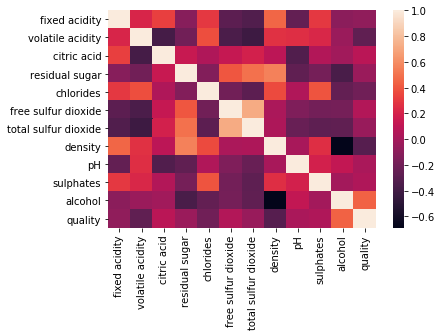

In [2]:
import seaborn as sns
sns.heatmap(df2.corr());

In [3]:
df2['type'] = df2['type'].map({'red': 1, 'white': 0})
print(df2.columns)
df2 = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality']]
df2

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
1098,6.5,0.29,0.25,10.60,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,0,6
3646,7.2,0.33,0.22,4.50,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,0,7
871,7.7,0.34,0.58,11.10,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,0,5
2550,6.2,0.33,0.14,4.80,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,0,5
3437,6.7,0.40,0.22,8.80,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,6.3,0.27,0.37,7.90,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,0,6
2328,6.9,0.35,0.55,11.95,0.038,22.0,111.0,0.99687,3.11,0.29,9.7,0,5
1202,8.6,0.42,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,1,8
498,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,1,8


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1098 to 941
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [5]:
y = df2['quality'].astype('int')

In [6]:
X = df2.drop('quality', axis=1)

In [7]:
X.shape, y.shape

((6497, 12), (6497,))

### train_test_split

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [10]:
X_train.shape, X_valid.shape

((4547, 12), (1950, 12))

# DecisionTreeClassifier

In [11]:
first_tree = DecisionTreeClassifier(random_state=17)
#DecisionTreeClassifier - Класифікатор дерева рішень

def model_predict(mod, X, y):
    print("predict in ", mod)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)
    #X_train, X_valid, y_train, y_valid
    model1 = mod.fit(X_train, y_train)
    print("mean for cross_val_score: ", np.mean(cross_val_score(mod, X_train, y_train, cv=5)))
    print("accuracy: ", accuracy_score(y_valid, model1.predict(X_valid)))
    print("MAE: ", mean_absolute_error(y_valid, model1.predict(X_valid)))
    print("MSE: ", mean_squared_error(y_valid, model1.predict(X_valid)))
    

model_predict(first_tree, X, y)    

predict in  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


mean for cross_val_score:  0.5636651797047836
accuracy:  0.5917948717948718
MAE:  0.5117948717948718
MSE:  0.7569230769230769


In [12]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.5636651797047836

In [13]:
cross_val_score(first_tree, X_train, y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.59450549, 0.54725275, 0.56765677, 0.56215622, 0.54675468])

In [14]:


first_tree.fit(X_train, y_train)
first_tree_y_pred = first_tree.predict(X_valid)

#print(classification_report(y_test, clf.predict(X_test)))
print("accuracy: ", accuracy_score(y_valid, first_tree_y_pred))
print("MAE: ", mean_absolute_error(y_valid, first_tree_y_pred))
print("MSE: ", mean_squared_error(y_valid, first_tree_y_pred))

accuracy:  0.5917948717948718
MAE:  0.5117948717948718
MSE:  0.7569230769230769


In [15]:
first_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

# kNN

In [16]:
knn=KNeighborsClassifier(5)
# fit with train data set (надавати train data set)
knn.fit(X_train, y_train)
print("prediction precision rate:",knn.score(X_valid,y_valid))

prediction precision rate: 0.47794871794871796


In [17]:
#print(classification_report(y_test, clf.predict(X_test)))
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_valid)

print("accuracy: ", accuracy_score(y_valid, knn_y_pred))
print("MAE: ", mean_absolute_error(y_valid, knn_y_pred))
print("MSE: ", mean_squared_error(y_valid, knn_y_pred))

accuracy:  0.47794871794871796
MAE:  0.6153846153846154
MSE:  0.8276923076923077


In [18]:
#sklearn.preprocessing.StandardScaler 

model_predict(first_tree, X, y) 

predict in  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


mean for cross_val_score:  0.5636651797047836
accuracy:  0.5917948717948718
MAE:  0.5117948717948718
MSE:  0.7569230769230769


In [19]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1098,6.5,0.29,0.25,10.60,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,0
3646,7.2,0.33,0.22,4.50,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,0
871,7.7,0.34,0.58,11.10,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,0
2550,6.2,0.33,0.14,4.80,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,0
3437,6.7,0.40,0.22,8.80,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,6.3,0.27,0.37,7.90,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,0
2328,6.9,0.35,0.55,11.95,0.038,22.0,111.0,0.99687,3.11,0.29,9.7,0
1202,8.6,0.42,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,1
498,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,1


### StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler


#X = scaler.fit(X).transform(X)
#y = scaler.fit(y).transform(y)
def scaler(data):
    scaler = StandardScaler()
    x = scaler.fit(data).transform(data) 
    return x
X_scaler = scaler(X)
#y = df_scaler[-1].


In [21]:
X_scaler[::,:12].shape

(6497, 12)

In [25]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1098,6.5,0.29,0.25,10.60,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,0
3646,7.2,0.33,0.22,4.50,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,0
871,7.7,0.34,0.58,11.10,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,0
2550,6.2,0.33,0.14,4.80,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,0
3437,6.7,0.40,0.22,8.80,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,6.3,0.27,0.37,7.90,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,0
2328,6.9,0.35,0.55,11.95,0.038,22.0,111.0,0.99687,3.11,0.29,9.7,0
1202,8.6,0.42,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,1
498,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,1


In [23]:
tree_2 = DecisionTreeClassifier(random_state=17)
#model_predict(first_tree, X, y)
X_train_s, X_valid_s, y_train_s, y_valid_s = train_test_split(X_scaler, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [33]:
quality = df2['quality'].groupby(df2['quality']).count()
quality

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [81]:
# Улучшение скора(Отримання збалансованого зразку шляхом надмірного збору)
# Get balanced sample by oversampling
df3=df2[df2['quality']==3]
df3=pd.concat([df3]*94)
df3
df4=df2[df2['quality']==4]
df4=pd.concat([df4]*14)
df5=df2[df2['quality']==5]
df3=pd.concat([df3]*94)
df6=df2[df2['quality']==6]

df7=df2[df2['quality']==7]
df7=pd.concat([df7]*3)
df8=df2[df2['quality']==8]
df8=pd.concat([df8]*14)
df9=df2[df2['quality']==9]
df9=pd.concat([df9]*566)
df_balanced=pd.concat([df3,df4,df5,df6,df7,df8,df9])
df_balanced.shape

(19587, 13)

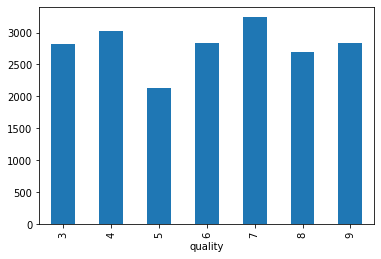

In [83]:
quality = df_balanced['quality'].groupby(df_balanced['quality']).count()
quality.plot(kind='bar')

In [84]:
df_balanced

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,1,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,0,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,1,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,1,3
1484,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,0,9
1605,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,0,9
827,7.4,0.240,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,0,9
774,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,0,9


In [124]:
y = df_balanced['quality'].astype('int')
X = df_balanced.iloc[:,:12]
X.shape
X_scaler = scaler(X)


X_train_s, X_valid_s, y_train_s, y_valid_s = train_test_split(X_scaler, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [106]:
tree_2.fit(X_train_s, y_train_s)
print("accuracy: ", accuracy_score(y_valid_s, tree_2.predict(X_valid_s)))
print("MAE: ", mean_absolute_error(y_valid_s, tree_2.predict(X_valid_s)))
print("MSE: ", mean_squared_error(y_valid_s, tree_2.predict(X_valid_s)))

accuracy:  0.9001191083886336
MAE:  0.11757699506550962
MSE:  0.1584141568827633


## svm

In [107]:
#X_train_s, y_train_s
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_s, y_train_s)
print("accuracy: ", accuracy_score(y_valid_s, tree_2.predict(X_valid_s)))
print("MAE: ", mean_absolute_error(y_valid_s, tree_2.predict(X_valid_s)))
print("MSE: ", mean_squared_error(y_valid_s, tree_2.predict(X_valid_s)))

accuracy:  0.9001191083886336
MAE:  0.11757699506550962
MSE:  0.1584141568827633


In [108]:
knn2=KNeighborsClassifier()
knn2.fit(X_train_s, y_train_s)
knn2_y_pred = knn2.predict(X_valid_s)

print("accuracy: ", accuracy_score(y_valid_s, knn2_y_pred))
print("MAE: ", mean_absolute_error(y_valid_s, knn2_y_pred))
print("MSE: ", mean_squared_error(y_valid_s, knn2_y_pred))

accuracy:  0.8317168623447337
MAE:  0.2133741704951506
MSE:  0.3130849072656117


In [113]:
%%time
from catboost import CatBoostClassifier, Pool

cbc = CatBoostClassifier(iterations=1000, ctr_leaf_count_limit=1)


cbc.fit(X_train_s, y_train_s)
cbc_y_pred =cbc.predict(X_valid_s)

print("accuracy: ", accuracy_score(y_valid_s, cbc_y_pred))
print("MAE: ", mean_absolute_error(y_valid_s, cbc_y_pred))
print("MSE: ", mean_squared_error(y_valid_s, cbc_y_pred))

Learning rate set to 0.09043
0:	learn: 1.8195382	total: 81.3ms	remaining: 1m 21s
1:	learn: 1.7417010	total: 132ms	remaining: 1m 5s
2:	learn: 1.6706450	total: 184ms	remaining: 1m 1s
3:	learn: 1.6054021	total: 268ms	remaining: 1m 6s
4:	learn: 1.5527575	total: 321ms	remaining: 1m 3s
5:	learn: 1.5052070	total: 376ms	remaining: 1m 2s
6:	learn: 1.4656028	total: 453ms	remaining: 1m 4s
7:	learn: 1.4264162	total: 508ms	remaining: 1m 2s
8:	learn: 1.3912851	total: 562ms	remaining: 1m 1s
9:	learn: 1.3629979	total: 640ms	remaining: 1m 3s
10:	learn: 1.3313512	total: 711ms	remaining: 1m 3s
11:	learn: 1.3080432	total: 801ms	remaining: 1m 5s
12:	learn: 1.2833790	total: 868ms	remaining: 1m 5s
13:	learn: 1.2601640	total: 917ms	remaining: 1m 4s
14:	learn: 1.2343114	total: 968ms	remaining: 1m 3s
15:	learn: 1.2188202	total: 1.02s	remaining: 1m 2s
16:	learn: 1.2012227	total: 1.11s	remaining: 1m 4s
17:	learn: 1.1811661	total: 1.16s	remaining: 1m 3s
18:	learn: 1.1670109	total: 1.2s	remaining: 1m 2s
19:	learn: 

164:	learn: 0.5603260	total: 9.58s	remaining: 48.5s
165:	learn: 0.5585469	total: 9.64s	remaining: 48.4s
166:	learn: 0.5566820	total: 9.69s	remaining: 48.3s
167:	learn: 0.5545059	total: 9.74s	remaining: 48.2s
168:	learn: 0.5529247	total: 9.8s	remaining: 48.2s
169:	learn: 0.5512867	total: 9.85s	remaining: 48.1s
170:	learn: 0.5500548	total: 9.9s	remaining: 48s
171:	learn: 0.5486428	total: 9.94s	remaining: 47.9s
172:	learn: 0.5469310	total: 9.99s	remaining: 47.8s
173:	learn: 0.5464308	total: 10.1s	remaining: 47.7s
174:	learn: 0.5452464	total: 10.1s	remaining: 47.6s
175:	learn: 0.5445441	total: 10.1s	remaining: 47.5s
176:	learn: 0.5433808	total: 10.2s	remaining: 47.4s
177:	learn: 0.5425921	total: 10.2s	remaining: 47.3s
178:	learn: 0.5407456	total: 10.3s	remaining: 47.2s
179:	learn: 0.5387710	total: 10.3s	remaining: 47.1s
180:	learn: 0.5375974	total: 10.4s	remaining: 47.1s
181:	learn: 0.5361589	total: 10.5s	remaining: 47s
182:	learn: 0.5346621	total: 10.5s	remaining: 46.9s
183:	learn: 0.5335

324:	learn: 0.4167958	total: 18.9s	remaining: 39.3s
325:	learn: 0.4165209	total: 19s	remaining: 39.3s
326:	learn: 0.4156936	total: 19s	remaining: 39.2s
327:	learn: 0.4151672	total: 19.1s	remaining: 39.1s
328:	learn: 0.4150636	total: 19.1s	remaining: 39s
329:	learn: 0.4148740	total: 19.2s	remaining: 39s
330:	learn: 0.4141194	total: 19.3s	remaining: 38.9s
331:	learn: 0.4134848	total: 19.3s	remaining: 38.8s
332:	learn: 0.4128353	total: 19.4s	remaining: 38.8s
333:	learn: 0.4124444	total: 19.4s	remaining: 38.7s
334:	learn: 0.4121078	total: 19.4s	remaining: 38.6s
335:	learn: 0.4114701	total: 19.5s	remaining: 38.5s
336:	learn: 0.4107440	total: 19.6s	remaining: 38.5s
337:	learn: 0.4100192	total: 19.6s	remaining: 38.4s
338:	learn: 0.4095852	total: 19.7s	remaining: 38.3s
339:	learn: 0.4089137	total: 19.7s	remaining: 38.2s
340:	learn: 0.4075762	total: 19.8s	remaining: 38.2s
341:	learn: 0.4070193	total: 19.8s	remaining: 38.1s
342:	learn: 0.4066286	total: 19.9s	remaining: 38.1s
343:	learn: 0.406271

485:	learn: 0.3329352	total: 27.4s	remaining: 28.9s
486:	learn: 0.3328191	total: 27.4s	remaining: 28.9s
487:	learn: 0.3325043	total: 27.5s	remaining: 28.8s
488:	learn: 0.3320783	total: 27.5s	remaining: 28.8s
489:	learn: 0.3313005	total: 27.6s	remaining: 28.7s
490:	learn: 0.3309990	total: 27.6s	remaining: 28.6s
491:	learn: 0.3305524	total: 27.7s	remaining: 28.6s
492:	learn: 0.3304219	total: 27.7s	remaining: 28.5s
493:	learn: 0.3301285	total: 27.8s	remaining: 28.5s
494:	learn: 0.3297008	total: 27.8s	remaining: 28.4s
495:	learn: 0.3292334	total: 27.9s	remaining: 28.3s
496:	learn: 0.3288940	total: 27.9s	remaining: 28.3s
497:	learn: 0.3283366	total: 28s	remaining: 28.2s
498:	learn: 0.3279636	total: 28s	remaining: 28.2s
499:	learn: 0.3275988	total: 28.1s	remaining: 28.1s
500:	learn: 0.3270472	total: 28.1s	remaining: 28s
501:	learn: 0.3262857	total: 28.2s	remaining: 28s
502:	learn: 0.3258692	total: 28.3s	remaining: 27.9s
503:	learn: 0.3254326	total: 28.3s	remaining: 27.9s
504:	learn: 0.324933

647:	learn: 0.2701582	total: 37.3s	remaining: 20.3s
648:	learn: 0.2694803	total: 37.4s	remaining: 20.2s
649:	learn: 0.2692979	total: 37.4s	remaining: 20.2s
650:	learn: 0.2689716	total: 37.5s	remaining: 20.1s
651:	learn: 0.2686260	total: 37.6s	remaining: 20s
652:	learn: 0.2684771	total: 37.6s	remaining: 20s
653:	learn: 0.2682227	total: 37.7s	remaining: 19.9s
654:	learn: 0.2680855	total: 37.7s	remaining: 19.9s
655:	learn: 0.2679413	total: 37.8s	remaining: 19.8s
656:	learn: 0.2676137	total: 37.8s	remaining: 19.7s
657:	learn: 0.2673459	total: 37.9s	remaining: 19.7s
658:	learn: 0.2667007	total: 37.9s	remaining: 19.6s
659:	learn: 0.2662588	total: 38s	remaining: 19.6s
660:	learn: 0.2660112	total: 38s	remaining: 19.5s
661:	learn: 0.2659399	total: 38.1s	remaining: 19.4s
662:	learn: 0.2656564	total: 38.1s	remaining: 19.4s
663:	learn: 0.2653689	total: 38.2s	remaining: 19.3s
664:	learn: 0.2649450	total: 38.2s	remaining: 19.3s
665:	learn: 0.2646566	total: 38.3s	remaining: 19.2s
666:	learn: 0.264424

808:	learn: 0.2285221	total: 46.5s	remaining: 11s
809:	learn: 0.2280958	total: 46.5s	remaining: 10.9s
810:	learn: 0.2279524	total: 46.6s	remaining: 10.9s
811:	learn: 0.2276307	total: 46.6s	remaining: 10.8s
812:	learn: 0.2275104	total: 46.7s	remaining: 10.7s
813:	learn: 0.2271928	total: 46.7s	remaining: 10.7s
814:	learn: 0.2270682	total: 46.8s	remaining: 10.6s
815:	learn: 0.2267487	total: 46.9s	remaining: 10.6s
816:	learn: 0.2265965	total: 46.9s	remaining: 10.5s
817:	learn: 0.2264814	total: 47s	remaining: 10.5s
818:	learn: 0.2263723	total: 47s	remaining: 10.4s
819:	learn: 0.2260104	total: 47.1s	remaining: 10.3s
820:	learn: 0.2259094	total: 47.1s	remaining: 10.3s
821:	learn: 0.2257242	total: 47.2s	remaining: 10.2s
822:	learn: 0.2254911	total: 47.2s	remaining: 10.2s
823:	learn: 0.2253803	total: 47.3s	remaining: 10.1s
824:	learn: 0.2253234	total: 47.3s	remaining: 10s
825:	learn: 0.2250417	total: 47.4s	remaining: 9.98s
826:	learn: 0.2247980	total: 47.5s	remaining: 9.93s
827:	learn: 0.224682

967:	learn: 0.1968782	total: 58.8s	remaining: 1.94s
968:	learn: 0.1967954	total: 58.8s	remaining: 1.88s
969:	learn: 0.1965775	total: 58.9s	remaining: 1.82s
970:	learn: 0.1963132	total: 58.9s	remaining: 1.76s
971:	learn: 0.1962143	total: 59s	remaining: 1.7s
972:	learn: 0.1960842	total: 59.1s	remaining: 1.64s
973:	learn: 0.1959718	total: 59.1s	remaining: 1.58s
974:	learn: 0.1957159	total: 59.2s	remaining: 1.52s
975:	learn: 0.1956586	total: 59.2s	remaining: 1.46s
976:	learn: 0.1955834	total: 59.3s	remaining: 1.4s
977:	learn: 0.1952590	total: 59.3s	remaining: 1.33s
978:	learn: 0.1951270	total: 59.4s	remaining: 1.27s
979:	learn: 0.1950869	total: 59.5s	remaining: 1.21s
980:	learn: 0.1949887	total: 59.5s	remaining: 1.15s
981:	learn: 0.1948552	total: 59.6s	remaining: 1.09s
982:	learn: 0.1946990	total: 59.6s	remaining: 1.03s
983:	learn: 0.1946134	total: 59.7s	remaining: 970ms
984:	learn: 0.1944735	total: 59.7s	remaining: 909ms
985:	learn: 0.1943221	total: 59.8s	remaining: 849ms
986:	learn: 0.19

# XGBoost for Imbalanced Classification

In [131]:
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import RepeatedStratifiedKFold


watchlist = [ (X_train_s, y_train_s,'train'), (X_valid_s, 'val') ]
param = 'multi:softprob'
xgb().fit(train[predictos], traint["hotel_cluster"])
bst = alg.train(param, X_train_s, num_round, watchlist, feval=map5eval, early_stopping_rounds=50, maximize=True);
yprob = bst.predict(X_valid_s).reshape( y_valid_s.shape[0], 100 )
ylabel = np.argmax(yprob, axis=1)

print ('predicting, classification error=%f' % \
       (np.sum( ylabel != y_valid_s) / float(y_valid_s.shape[0]) ))

NameError: name 'train' is not defined

In [123]:
y.shape

(10000,)

Counter({0: 9900, 1: 100})


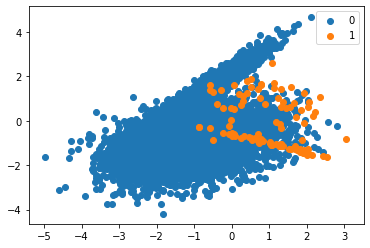

In [119]:

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()